In [1]:
import pandas as pd
import re
from glob import glob
from tqdm import tqdm
from openpyxl import Workbook

In [2]:
def mr_dataset():
    files = glob("/home/vimalkumar/Documents/images/Sentiment analysis/*.txt")
    for i,file_name in enumerate(files):
        if file_name[0] == "s":
            continue
        df = pd.DataFrame(columns=["classname", "sentence"])      
        with open(file_name,"r",encoding="latin-1") as f:
            all_lines = f.readlines()
            for line in tqdm(all_lines):
                line = re.sub("\n", "", line)
                df = df.append({"classname":i, "sentence":line}, ignore_index=True)
            df.to_excel(file_name.split(".")[0]+".xlsx")
            f.close()
    return df


In [3]:
df = mr_dataset()


100%|██████████████████████████████████████| 5331/5331 [00:08<00:00, 620.75it/s]


In [4]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import re 
import string 
import math
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import scipy.stats

[nltk_data] Downloading package punkt to /home/vimalkumar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Reading the file .
df= pd.read_excel("/home/vimalkumar/Documents/images/Sentiment analysis/negative_tamil.xlsx")

In [6]:
df.head()

,Unnamed: 0,வகுப்பு பெயர்,வாக்கியம்
0,0,0,"எளிமையான, வேடிக்கையான மற்றும் கடினமான."
1,1,0,இது மிகவும் இளமையாகவும் இளமையாகவும் இருக்கிறது...
2,2,0,சுரண்டல் மற்றும் பெரும்பாலும் ஆழம் அல்லது நுட்...
3,3,0,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...
4,4,0,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...


In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df = df.rename(columns={'வகுப்பு பெயர்':'classname','வாக்கியம்':'Sentences'})
df.head()

,classname,Sentences
0,0,"எளிமையான, வேடிக்கையான மற்றும் கடினமான."
1,0,இது மிகவும் இளமையாகவும் இளமையாகவும் இருக்கிறது...
2,0,சுரண்டல் மற்றும் பெரும்பாலும் ஆழம் அல்லது நுட்...
3,0,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...
4,0,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...


In [9]:
df['Sentences'] =  [re.sub(r'[?|$|.|!|।|,|:|;|]','', str(x)) for x in df['Sentences']]
df['totalwords'] = df['Sentences'].str.split().str.len()

In [10]:
df

,classname,Sentences,totalwords
0,0,எளிமையான வேடிக்கையான மற்றும் கடினமான,4
1,0,இது மிகவும் இளமையாகவும் இளமையாகவும் இருக்கிறது...,13
2,0,சுரண்டல் மற்றும் பெரும்பாலும் ஆழம் அல்லது நுட்...,11
3,0,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...,12
4,0,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...,12
...,...,...,...
5326,0,ஒரு பயங்கரமான திரைப்படம் இருப்பினும் சிலர் நகரும்,6
5327,0,'நேர விரயம்' என்பதற்குப் பல வரையறைகள் உள்ளன ஆன...,14
5328,0,அது இருப்பது போல முதலை வேட்டைக்காரன் 1959 காட...,30
5329,0,இந்த விஷயம் வீட்டிற்கே தயாரிக்கப்பட்ட வீடியோ வ...,8


In [11]:
#  Average number of words in each sentence.
sum=df['totalwords'].sum() # total number of words in all sentences.
n=df['totalwords'].count() # total number of sentences.
aver_words=sum/n
print(sum)
print(n)
print(aver_words)

74629
5331
13.999062089664228


In [12]:
lt = df["Sentences"].tolist()
lt

['எளிமையான வேடிக்கையான மற்றும் கடினமான',
 'இது மிகவும் இளமையாகவும் இளமையாகவும் இருக்கிறது டீன் ஏஜ் பையன்கள் மட்டுமே அதை வேடிக்கை பார்க்க முடியும்',
 'சுரண்டல் மற்றும் பெரும்பாலும் ஆழம் அல்லது நுட்பம் இல்லாதது இது குற்றங்களை தாங்கக்கூடியதாக இருக்கும்',
 '[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகரிக்கிறது  அதற்கு பதிலாக  சூழ்நிலை சூழ்நிலையின் வளைந்த மெலோடிராமாவை வெளியேற்றுகிறது ',
 'பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒளிபுகா மற்றும் உணர்வுப்பூர்வமாக வெறுமையான நடை மற்றும் மர்மப் பயிற்சி',
 'அவர்கள் வருவதைப் போலவே கதையும் அசல் அல்ல ஏற்கனவே நான் எண்ணுவதை விட அதிக முறை மறுசுழற்சி செய்யப்பட்டுள்ளது',
 'திரைப்படத்திற்கு புள்ளிகளைக் கொடுப்பதற்கான ஒரே விஷயம் துணிச்சலாகும் -- முற்றிலும் பழமையான கருத்தை எடுத்து பார்வையாளர்களின் இறைச்சி சாணை மூலம் அதை மீண்டும் ஒரு முறை தள்ள வேண்டும்',
 'புளிப்பு போன்ற கேலிக்கூத்து இல்லை ',
 'துரதிருஷ்டவசமாக கதை மற்றும் நடிகர்கள் ஒரு ஹேக் ஸ்கிரிப்டுடன் வழங்கப்படுகிறார்கள்',
 'தொடர் கொலைகள் தொடர்பான அதன் ஒப்பீட்டளவில் கூர்மையற்ற குறிப்புகளுக்கு மிகவும் க

In [13]:
lt_1 = lt[:1500]
lt_2 = lt[1500:3000]
lt_3 = lt[3000:4500]
lt_4 = lt[:4500]

In [18]:
join_1 = ' '.join(lt_1)
join_2 = ' '.join(lt_2)
join_3 = ' '.join(lt_3)
join_4 = ' '.join(lt_4)


In [20]:
joint_words = join_1 + join_2 + join_3 + join_4

In [21]:
tokenized_word=word_tokenize(joint_words)

In [22]:
tokenized_word

['எளிமையான',
 'வேடிக்கையான',
 'மற்றும்',
 'கடினமான',
 'இது',
 'மிகவும்',
 'இளமையாகவும்',
 'இளமையாகவும்',
 'இருக்கிறது',
 'டீன்',
 'ஏஜ்',
 'பையன்கள்',
 'மட்டுமே',
 'அதை',
 'வேடிக்கை',
 'பார்க்க',
 'முடியும்',
 'சுரண்டல்',
 'மற்றும்',
 'பெரும்பாலும்',
 'ஆழம்',
 'அல்லது',
 'நுட்பம்',
 'இல்லாதது',
 'இது',
 'குற்றங்களை',
 'தாங்கக்கூடியதாக',
 'இருக்கும்',
 '[',
 'garbus',
 ']',
 'நோயியல்',
 'ஆய்வுக்கான',
 'சாத்தியத்தை',
 'நிராகரிக்கிறது',
 'அதற்கு',
 'பதிலாக',
 'சூழ்நிலை',
 'சூழ்நிலையின்',
 'வளைந்த',
 'மெலோடிராமாவை',
 'வெளியேற்றுகிறது',
 'பார்வைக்கு',
 'பளபளப்பான',
 'ஆனால்',
 'விவரிப்புரீதியாக',
 'ஒளிபுகா',
 'மற்றும்',
 'உணர்வுப்பூர்வமாக',
 'வெறுமையான',
 'நடை',
 'மற்றும்',
 'மர்மப்',
 'பயிற்சி',
 'அவர்கள்',
 'வருவதைப்',
 'போலவே',
 'கதையும்',
 'அசல்',
 'அல்ல',
 'ஏற்கனவே',
 'நான்',
 'எண்ணுவதை',
 'விட',
 'அதிக',
 'முறை',
 'மறுசுழற்சி',
 'செய்யப்பட்டுள்ளது',
 'திரைப்படத்திற்கு',
 'புள்ளிகளைக்',
 'கொடுப்பதற்கான',
 'ஒரே',
 'விஷயம்',
 'துணிச்சலாகும்',
 '--',
 'முற்றிலும்',
 'பழமையான',
 'கருத்தை',
 

In [24]:
# Frequency distribution of all sentences.
fdist = FreqDist(tokenized_word)
fdist

FreqDist({'ஒரு': 3924, 'மற்றும்': 2996, 'ஆனால்': 1394, 'மிகவும்': 1254, 'இது': 1242, 'அது': 1022, 'அதன்': 964, 'இந்த': 932, 'இல்லை': 880, 'திரைப்படம்': 800, ...})

In [26]:
# type token ratio
l=len(fdist)
print(l)
type_token_ratio=(l/sum)*100
print(type_token_ratio)

18733
25.101502097040022


In [31]:
# Removing stop words from each sentences
stop_words =  set(open('/home/vimalkumar/Documents/images/Sentiment analysis/stop_words/stop_words_tamil.txt').read().split())
df['sentence_without_stopwords'] = df['Sentences'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [32]:
df

,classname,Sentences,totalwords,sentence_without_stopwords
0,0,எளிமையான வேடிக்கையான மற்றும் கடினமான,4,எளிமையான வேடிக்கையான கடினமான
1,0,இது மிகவும் இளமையாகவும் இளமையாகவும் இருக்கிறது...,13,இளமையாகவும் இளமையாகவும் இருக்கிறது டீன் ஏஜ் பை...
2,0,சுரண்டல் மற்றும் பெரும்பாலும் ஆழம் அல்லது நுட்...,11,சுரண்டல் பெரும்பாலும் ஆழம் நுட்பம் இல்லாதது கு...
3,0,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...,12,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...
4,0,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...,12,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...
...,...,...,...,...
5326,0,ஒரு பயங்கரமான திரைப்படம் இருப்பினும் சிலர் நகரும்,6,பயங்கரமான திரைப்படம் இருப்பினும் சிலர் நகரும்
5327,0,'நேர விரயம்' என்பதற்குப் பல வரையறைகள் உள்ளன ஆன...,14,'நேர விரயம்' என்பதற்குப் வரையறைகள் ஆனால் படம் ...
5328,0,அது இருப்பது போல முதலை வேட்டைக்காரன் 1959 காட...,30,இருப்பது முதலை வேட்டைக்காரன் 1959 காட்ஜில்லாவி...
5329,0,இந்த விஷயம் வீட்டிற்கே தயாரிக்கப்பட்ட வீடியோ வ...,8,விஷயம் வீட்டிற்கே தயாரிக்கப்பட்ட வீடியோ விரைவு...


In [34]:
# Removing the unwanted chacters and finding total number of words in each sentence.
df['sentence_without_stopwords'] =  [re.sub(r'[?|$|.|!|।|,|:|;|]','', str(x)) for x in df['sentence_without_stopwords']]
df['totalwords_without_stopwords'] = df['sentence_without_stopwords'].str.split().str.len() 

In [35]:
df.head()

,classname,Sentences,totalwords,sentence_without_stopwords,totalwords_without_stopwords
0,0,எளிமையான வேடிக்கையான மற்றும் கடினமான,4,எளிமையான வேடிக்கையான கடினமான,3
1,0,இது மிகவும் இளமையாகவும் இளமையாகவும் இருக்கிறது...,13,இளமையாகவும் இளமையாகவும் இருக்கிறது டீன் ஏஜ் பை...,9
2,0,சுரண்டல் மற்றும் பெரும்பாலும் ஆழம் அல்லது நுட்...,11,சுரண்டல் பெரும்பாலும் ஆழம் நுட்பம் இல்லாதது கு...,7
3,0,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...,12,[garbus] நோயியல் ஆய்வுக்கான சாத்தியத்தை நிராகர...,11
4,0,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...,12,பார்வைக்கு பளபளப்பான ஆனால் விவரிப்புரீதியாக ஒள...,10


In [39]:
sum_without=df['totalwords_without_stopwords'].sum() # total number of words in all sentences.
n_without=df['totalwords_without_stopwords'].count() # total number of sentences.
aver_words_without=sum_without/n_without
print(sum_without)
print(n_without)
print(aver_words_without)

59906
5331
11.23729131495029


In [40]:
# Frequency distribution of all sentences.
fdist_without = FreqDist(tokenized_word)
fdist_without

FreqDist({'ஒரு': 3924, 'மற்றும்': 2996, 'ஆனால்': 1394, 'மிகவும்': 1254, 'இது': 1242, 'அது': 1022, 'அதன்': 964, 'இந்த': 932, 'இல்லை': 880, 'திரைப்படம்': 800, ...})

In [43]:
# type token ratio
l_without=len(fdist_without)
print(l_without)
type_token_ratio_without=(l_without/sum_without)*100
print(type_token_ratio_without)

18733
31.270657363202346


In [44]:
# Pearson's correlation between sentences with stop words and sentences without stop words.
l=df['totalwords'].corr(df['totalwords_without_stopwords'])
l

0.9641163958301378

In [45]:
# Spearmam ' s correlation between sentences with stop words and sentences without stop words .
scipy.stats.spearmanr(df['totalwords'],df['totalwords_without_stopwords'] )[0]

0.9652815277350248

In [46]:
# importing required library
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties
import requests


In [47]:
# Tokenization of each character.
lst=[character for word in tokenized_word
         for character in word ]

In [48]:
lst

['எ',
 'ள',
 'ி',
 'ம',
 'ை',
 'ய',
 'ா',
 'ன',
 'வ',
 'ே',
 'ட',
 'ி',
 'க',
 '்',
 'க',
 'ை',
 'ய',
 'ா',
 'ன',
 'ம',
 'ற',
 '்',
 'ற',
 'ு',
 'ம',
 '்',
 'க',
 'ட',
 'ி',
 'ன',
 'ம',
 'ா',
 'ன',
 'இ',
 'த',
 'ு',
 'ம',
 'ி',
 'க',
 'வ',
 'ு',
 'ம',
 '்',
 'இ',
 'ள',
 'ம',
 'ை',
 'ய',
 'ா',
 'க',
 'வ',
 'ு',
 'ம',
 '்',
 'இ',
 'ள',
 'ம',
 'ை',
 'ய',
 'ா',
 'க',
 'வ',
 'ு',
 'ம',
 '்',
 'இ',
 'ர',
 'ு',
 'க',
 '்',
 'க',
 'ி',
 'ற',
 'த',
 'ு',
 'ட',
 'ீ',
 'ன',
 '்',
 'ஏ',
 'ஜ',
 '்',
 'ப',
 'ை',
 'ய',
 'ன',
 '்',
 'க',
 'ள',
 '்',
 'ம',
 'ட',
 '்',
 'ட',
 'ு',
 'ம',
 'ே',
 'அ',
 'த',
 'ை',
 'வ',
 'ே',
 'ட',
 'ி',
 'க',
 '்',
 'க',
 'ை',
 'ப',
 'ா',
 'ர',
 '்',
 'க',
 '்',
 'க',
 'ம',
 'ு',
 'ட',
 'ி',
 'ய',
 'ு',
 'ம',
 '்',
 'ச',
 'ு',
 'ர',
 'ண',
 '்',
 'ட',
 'ல',
 '்',
 'ம',
 'ற',
 '்',
 'ற',
 'ு',
 'ம',
 '்',
 'ப',
 'ெ',
 'ர',
 'ு',
 'ம',
 '்',
 'ப',
 'ா',
 'ல',
 'ு',
 'ம',
 '்',
 'ஆ',
 'ழ',
 'ம',
 '்',
 'அ',
 'ல',
 '்',
 'ல',
 'த',
 'ு',
 'ந',
 'ு',
 'ட',
 '்',
 'ப',
 'ம',
 '்'

In [69]:
# Storing the top ten frequency in variable.
p=fdist.most_common(10)
# Converting it into list
p= dict(p)
p

{'ஒரு': 3924,
 'மற்றும்': 2996,
 'ஆனால்': 1394,
 'மிகவும்': 1254,
 'இது': 1242,
 'அது': 1022,
 'அதன்': 964,
 'இந்த': 932,
 'இல்லை': 880,
 'திரைப்படம்': 800}

In [87]:
#data = pd.DataFrame(p)
data = pd.DataFrame.from_dict(p, orient="index").reset_index()
#data = data.rename(columns={0:'counts'})
data

,index,0
0,ஒரு,3924
1,மற்றும்,2996
2,ஆனால்,1394
3,மிகவும்,1254
4,இது,1242
5,அது,1022
6,அதன்,964
7,இந்த,932
8,இல்லை,880
9,திரைப்படம்,800


<AxesSubplot:xlabel='index', ylabel='count'>

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2962 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3009 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2990 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2993 missing from current fon

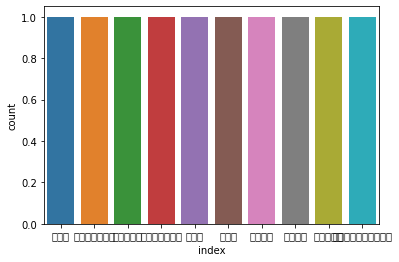

In [90]:
import seaborn as sns
sns.countplot(x='index',data=data)